# Image Processing Lab №6
Text Segmentation

In [28]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display

import matplotlib.pyplot as plt

from pathlib import Path

In [29]:
def open_image(image_name=None, images_dir=None):
    if images_dir:
        image_list = []
        for path in images_dir.iterdir():
            image = Image.open(path)
            image_list.append(image)
        return image_list

    image_folder = Path('input/'+image_name)
    try:
        image = Image.open(image_folder)
    except FileNotFoundError:
        print(f'Image file not found: {image_folder}')
    
    return image

pth = Path('input/')

In [30]:
def display_image(img):
    display(Image.fromarray(img.astype(np.uint8)))

In [31]:
def save_image(path: str, img: np.array):
    Image.fromarray(img.astype(np.uint8)).save(path)

In [32]:
def calculate_projections(img):
    img_pr = np.where(img < 128, 1, 0)
    plt.figure(figsize=(80, 20))

    plt.subplot(2, 2, 4)
    plt.plot(range(img.shape[1]), img_pr.sum(axis=0), color='black')
    plt.title('Vertical Projection')
    plt.xlabel('Y')
    plt.ylabel('Weight')
    plt.ylim(0, img.shape[0])
    plt.xlim(0, img.shape[1])

    plt.subplot(2, 2, 2)
    plt.imshow(img, cmap='gray', aspect='auto')
    plt.title(f'Text')
    plt.axis('off')

    plt.subplot(2, 2, 1)
    plt.plot(img_pr.sum(axis=1), range(img.shape[0]-1, -1, -1), color='black')
    plt.title('Horizontal Projection')
    plt.xlabel('Weight')
    plt.ylabel('X')
    plt.ylim(0, img.shape[0])
    plt.xlim(0, img.shape[1])

    plt.tight_layout()

    plt.show()

In [33]:
img = np.array(open_image('text_preprocessed.bmp'))

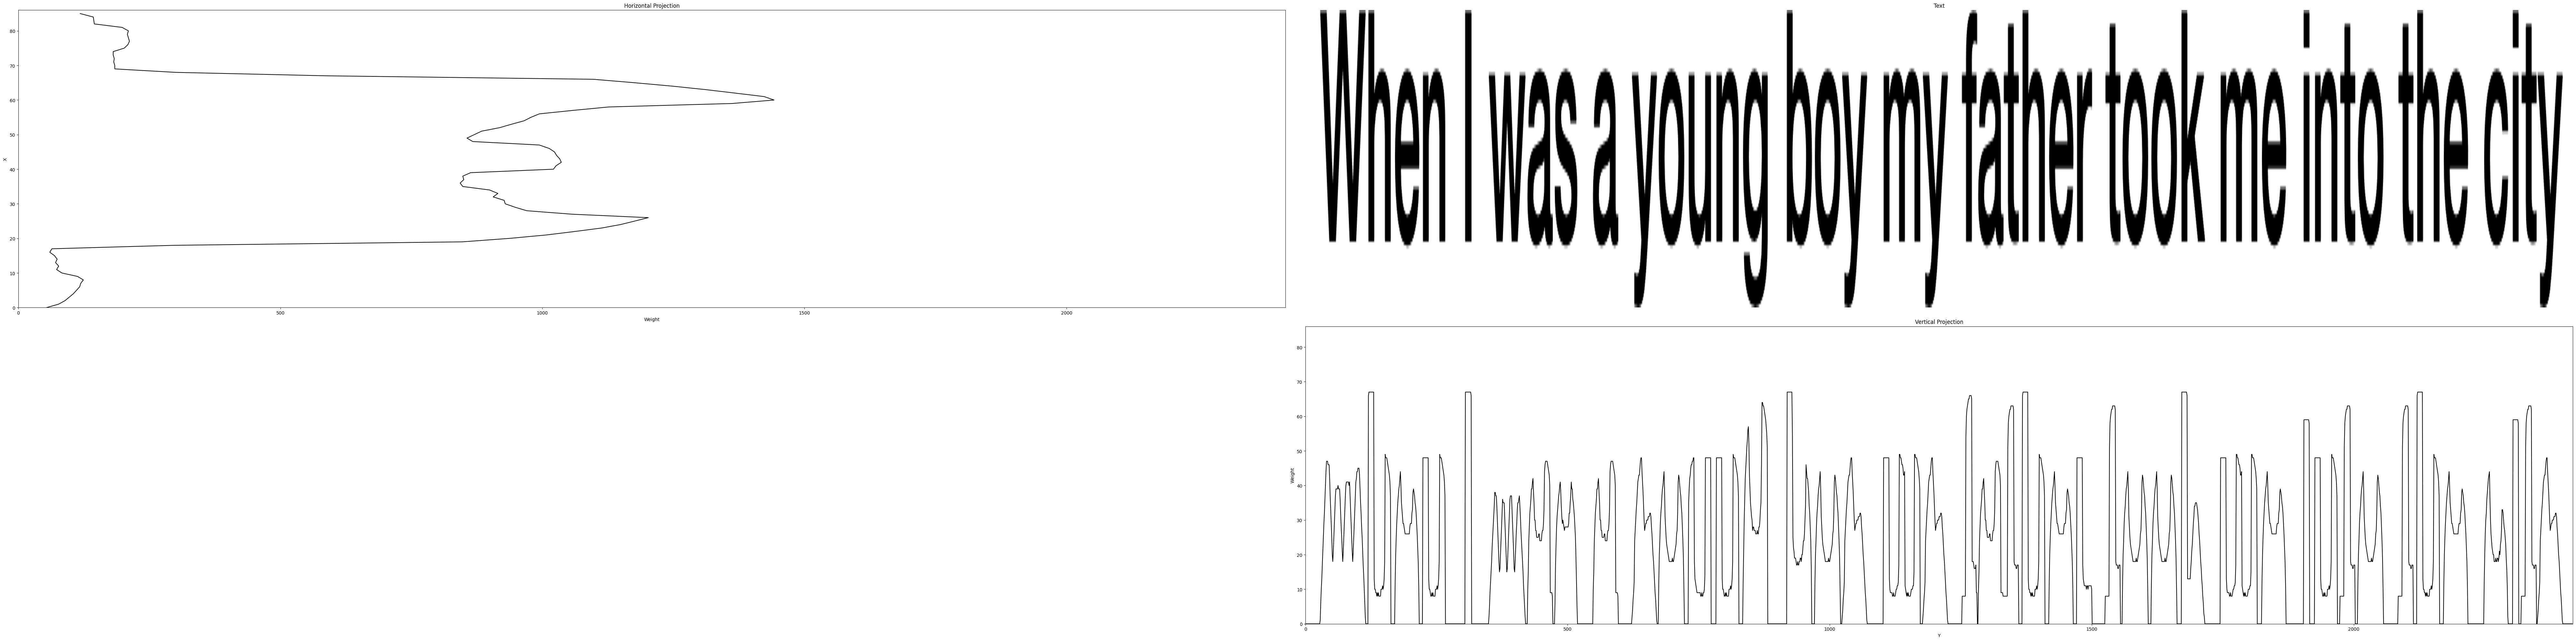

In [34]:
calculate_projections(img)

In [35]:
img_pr = np.where(img < 128, 1, 0)
hor_proj = img_pr.sum(axis=1)

In [36]:
row_sep = np.argmin(hor_proj, 0)

In [37]:
first_row = img[:row_sep, :]

In [38]:
# second_row = img[row_sep:, :]

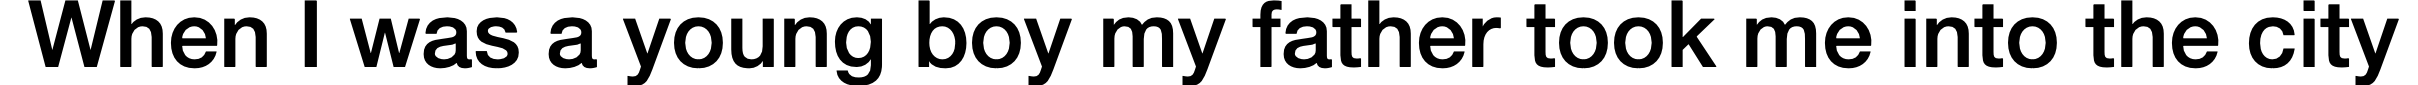

In [40]:
display_image(first_row)
# display_image(second_row)

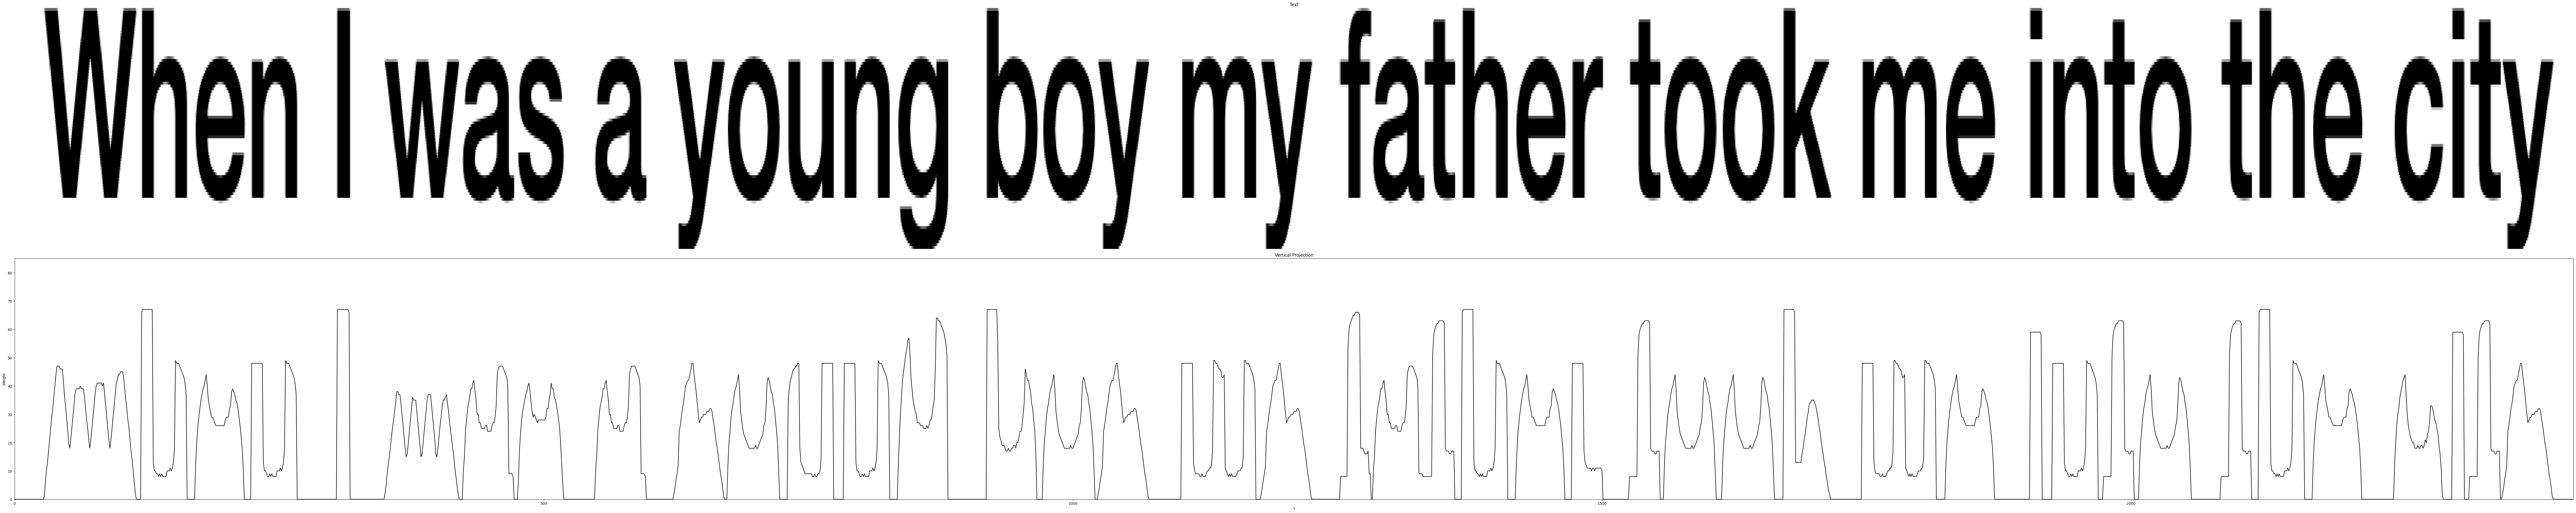

In [41]:
img_pr = np.where(first_row < 128, 1, 0)
plt.figure(figsize=(100, 20))

plt.subplot(2, 1, 2)
plt.plot(range(img.shape[1]), img_pr.sum(axis=0), color='black')
plt.title('Vertical Projection')
plt.xlabel('Y')
plt.ylabel('Weight')
plt.ylim(0, first_row.shape[0])
plt.xlim(0, first_row.shape[1])

plt.subplot(2, 1, 1)
plt.imshow(first_row, cmap='gray', aspect='auto')
plt.title(f'Text')
plt.axis('off')

plt.tight_layout()

plt.show()

In [44]:
def get_characters(img):
    img_pr = np.where(img < 128, 1, 0)
    segment_points = np.where(img_pr.sum(axis=0) < 7)[0]

    character_bounds = []

    start_index = 0

    for i in range(len(segment_points)):
        try:
            if np.abs(segment_points[i+1] - segment_points[i]) < 10 or segment_points[i] - start_index < 30:
                continue
            character_bounds.append((start_index, segment_points[i]))
            
            start_index = segment_points[i] + 1
        except:
            character_bounds.append((start_index, segment_points[i]))
            
            start_index = segment_points[i] + 1

    character_bounds.append((start_index, img_pr.sum(axis=0).shape[0] - 1))

    return character_bounds

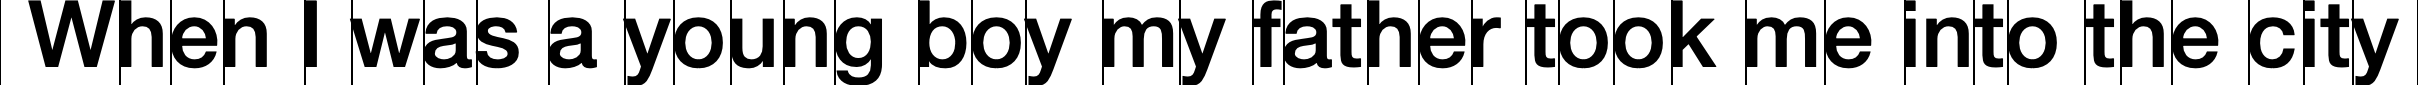

In [46]:
for idx, character in enumerate(get_characters(first_row)):
    try:
        save_image(f'output/row1_{idx}.bmp', first_row[:, character[0]:character[1]])
        first_row[:, character[0]] = 0
        first_row[:, character[1]] = 0
        
    except:
        continue

# for idx, character in enumerate(get_characters(second_row)):
#     try:
#         save_image(f'output/row2_{idx}.bmp', second_row[:, character[0]:character[1]])
#     except:
#         continue

display_image(first_row)